In [1]:
import argparse
import time
import numpy
import torch
import utils

import tensorboard

from gym_minigrid.wrappers import FullyObsWrapper

In [2]:
env_s = 'MiniGrid-DoorKey-6x6-v0'
model_s = 'DoorKey6'


In [6]:
gif = 'DoorKey6v2'
argmax = False
memory = False
text = False
episodes = 1
shift = 0
pause = 0.1

Device: cpu

Environment loaded

model dir = storage/DoorKey6
Obs size is: 64
Agent loaded



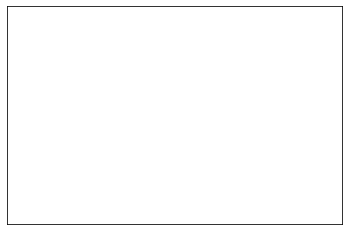

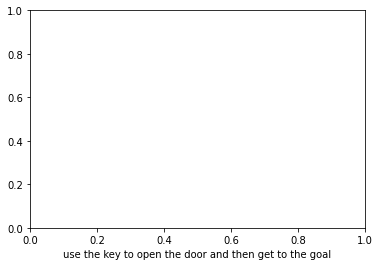

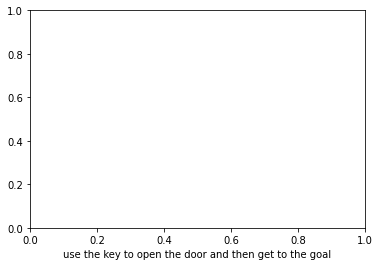

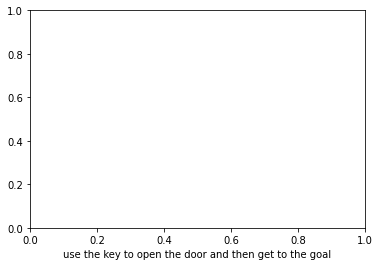

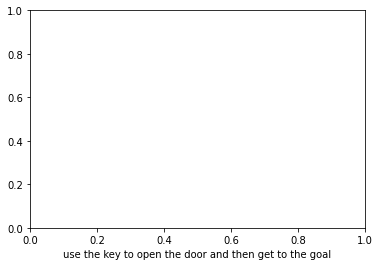

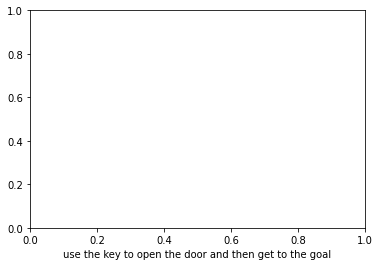

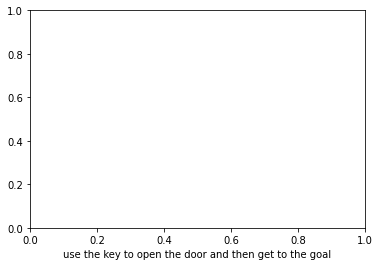

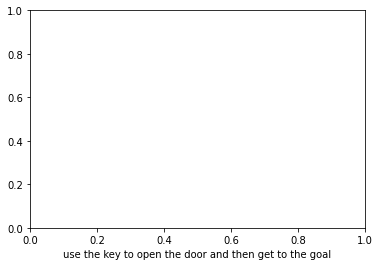

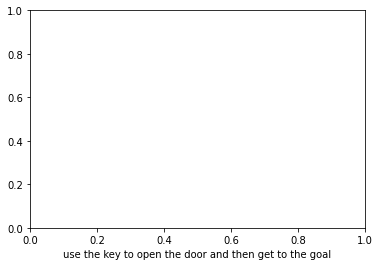

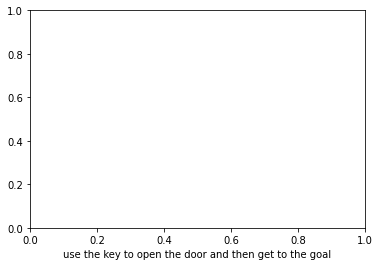

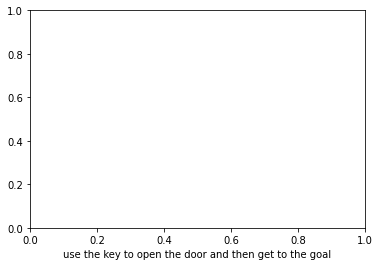

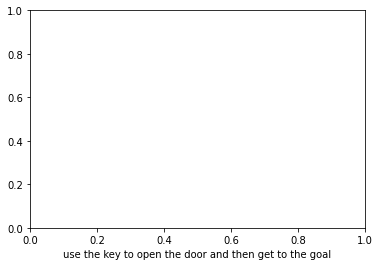

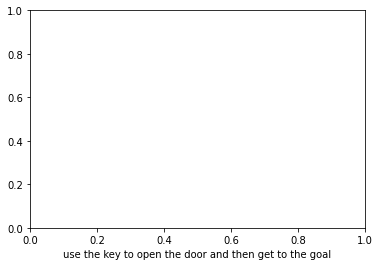

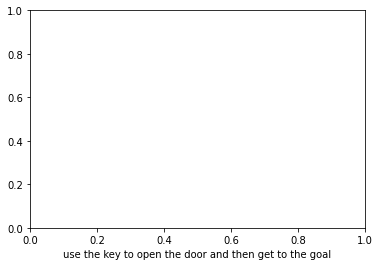

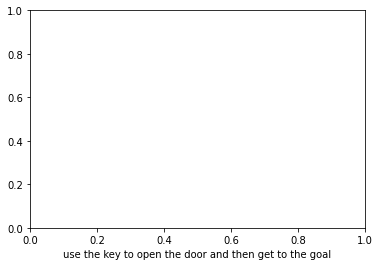

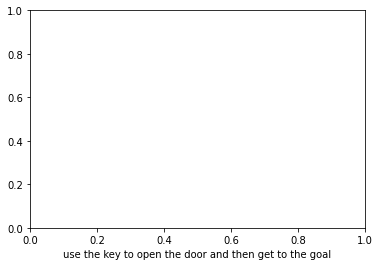

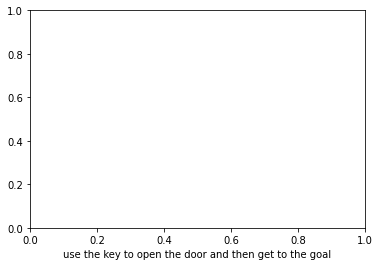

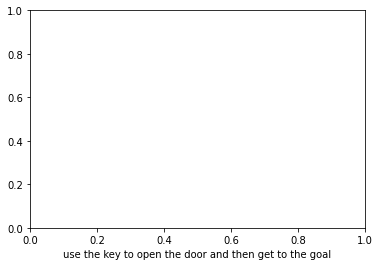

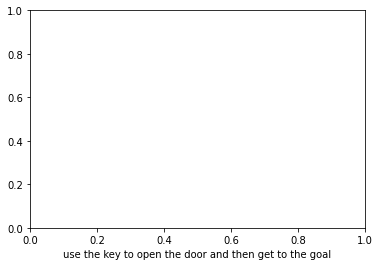

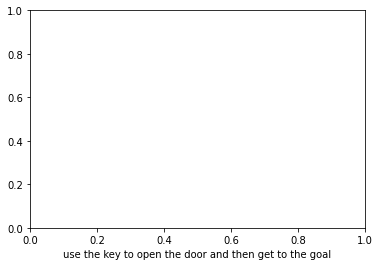

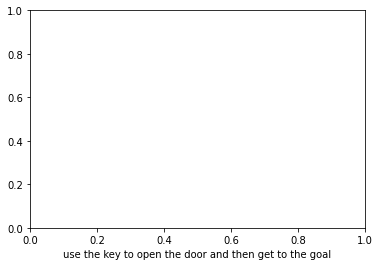

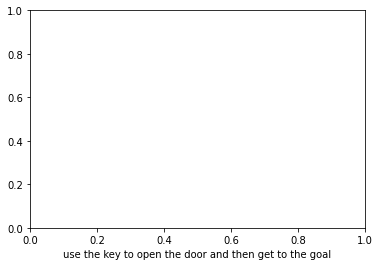

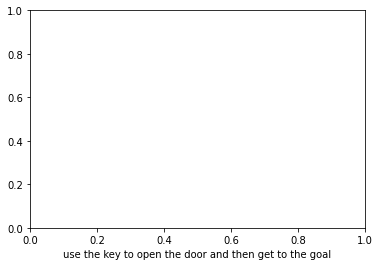

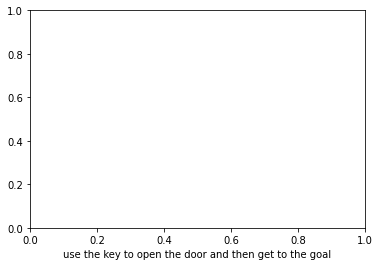

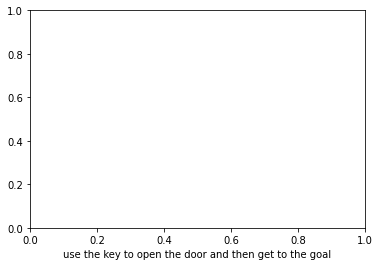

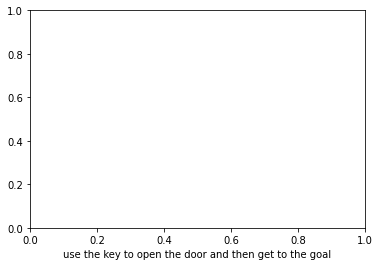

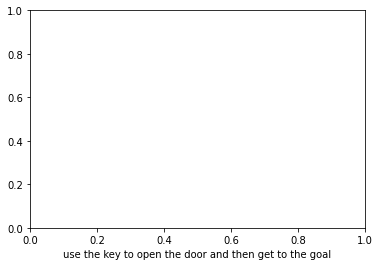

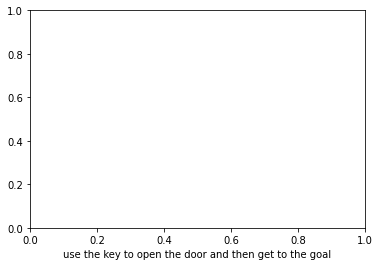

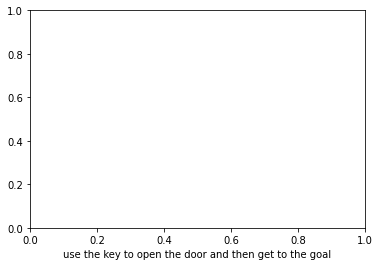

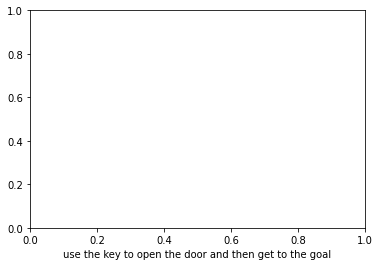

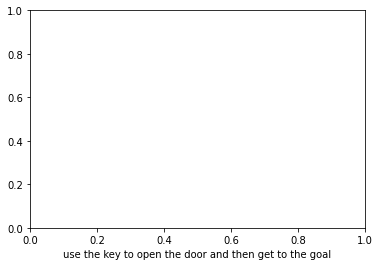

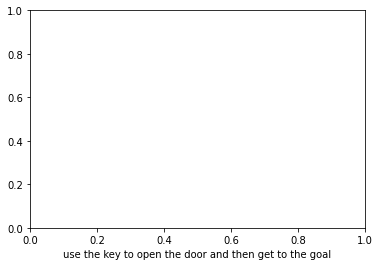

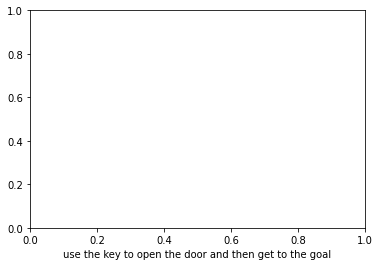

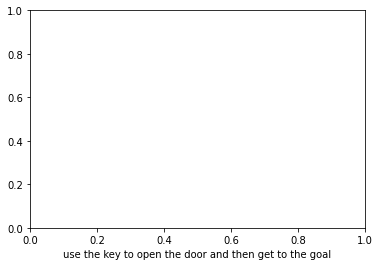

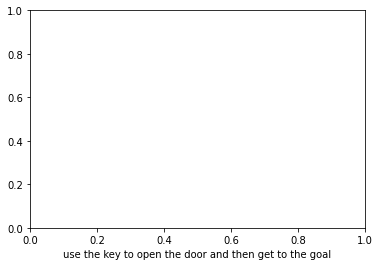

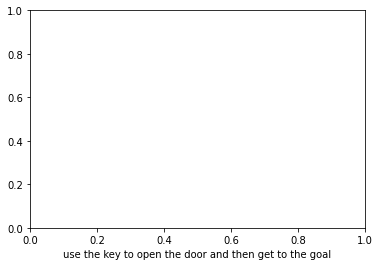

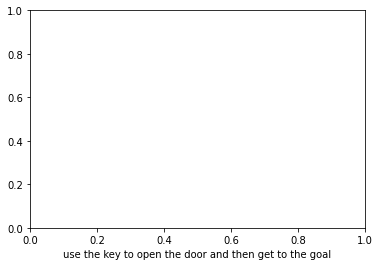

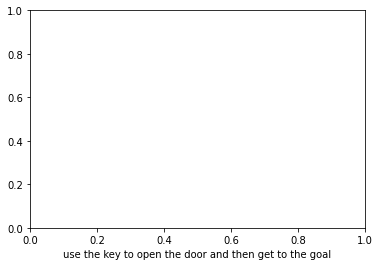

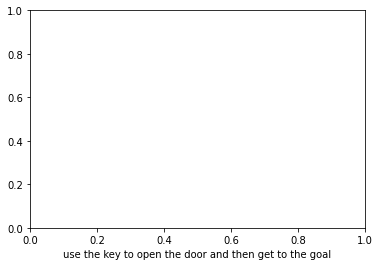

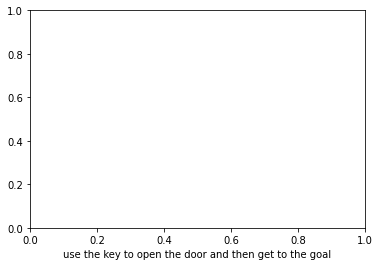

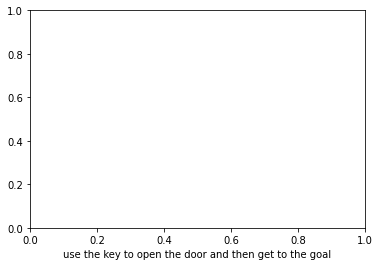

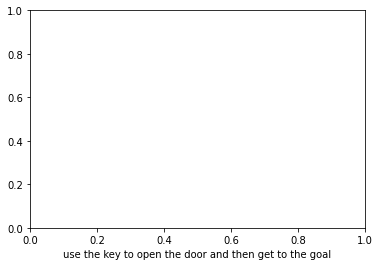

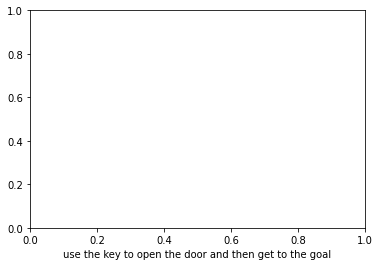

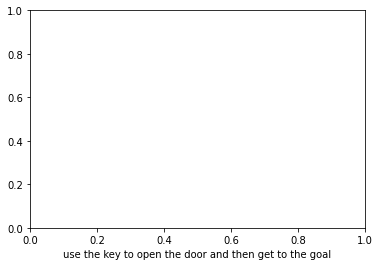

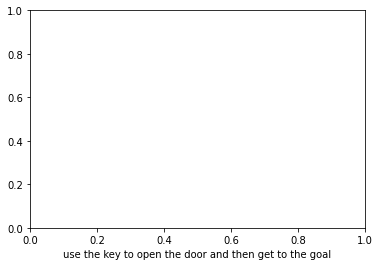

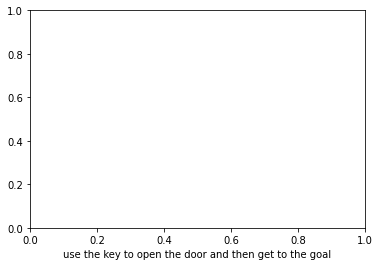

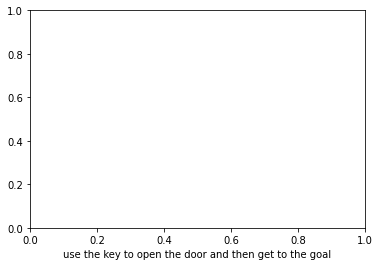

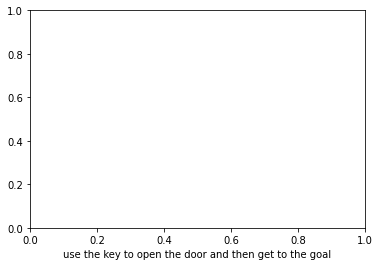

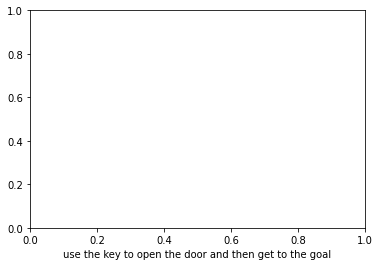

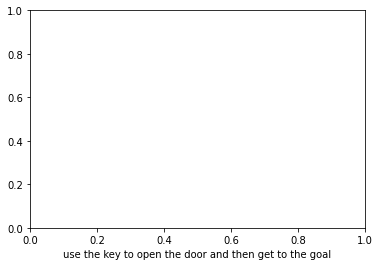

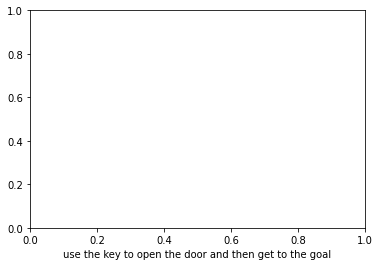

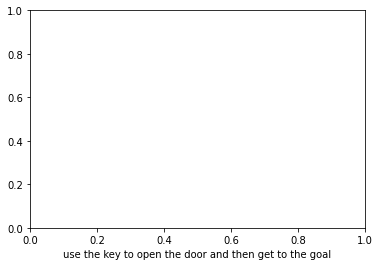

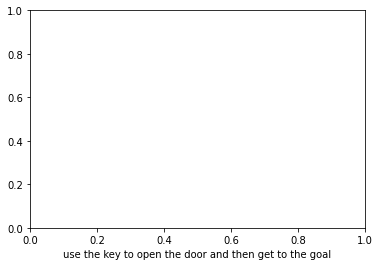

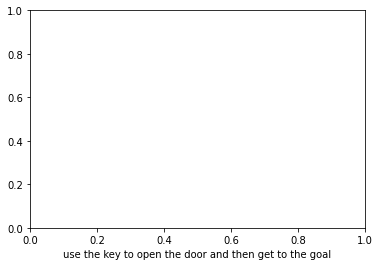

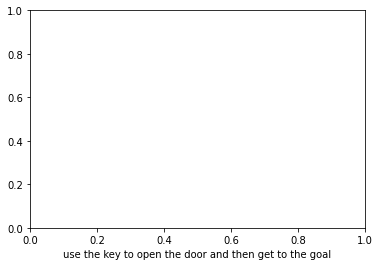

Saving gif... Done.


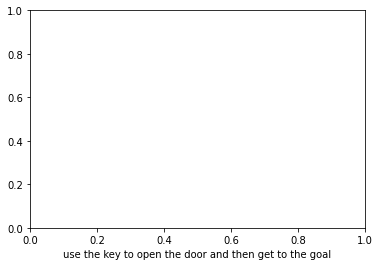

In [7]:
# Set seed for all randomness sources

# utils.seed(args.seed)

# Set device

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}\n")

# Load environment

env = utils.make_env(env_s)
# env = FullyObsWrapper(env)
for _ in range(shift):
    env.reset()
print("Environment loaded\n")

# Load agent

model_dir = utils.get_model_dir(model_s)
print("model dir = " + str(model_dir))
agent = utils.Agent(env.observation_space, env.action_space, model_dir, device=device, argmax=False, use_memory=False, use_text=False)
print("Agent loaded\n")

# Run the agent

if gif:
   from array2gif import write_gif
   frames = []

# Create a window to view the environment
env.render('human')

for episode in range(episodes):
    obs = env.reset()

    while True:
        env.render('human')
        if gif:
            frames.append(numpy.moveaxis(env.render("rgb_array"), 2, 0))

        action = agent.get_action(obs)
        obs, reward, done, _ = env.step(action)
        agent.analyze_feedback(reward, done)

        if done or env.window.closed:
            break

    if env.window.closed:
        break

if gif:
    print("Saving gif... ", end="")
    write_gif(numpy.array(frames), gif+".gif", fps=1/pause)
    print("Done.")


In [ ]:
%load_ext tensorboard

![SegmentLocal](DoorKey6v2.gif "segment")

In [ ]:
# logdir = 'storage/Empty' 
%tensorboard --logsdir='storage/Empty' logs --bind_all

In [ ]:
import tensorflow as tf
print(tf.__version__)
